In [1]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv(r"..\Data\Energy_merged.csv")
data.head()

,Unnamed: 0,state_id,year,conventional_energy,green_energy,pop_ideology,gov_ideology,population,median_income,green_per_capita,conv_per_capita,energy_total,perc_green_energy,perc_conv_energy,perc_change_green
0,0,AK,1990,4624985.0,974521.0,54.808483,55.817959,553290.0,71686,1.761320,8.359061,5599506.0,0.174037,0.825963,0.000000
1,1,AK,1991,4493715.0,896113.0,48.720062,53.505939,570193.0,71482,1.571596,7.881042,5389828.0,0.166260,0.833740,-0.007777
2,2,AK,1992,4380304.0,918120.0,52.377396,53.505939,588736.0,71791,1.559477,7.440184,5298424.0,0.173282,0.826718,0.007022
3,3,AK,1993,4418285.0,1302992.0,51.263107,50.661583,599432.0,71917,2.173711,7.370786,5721277.0,0.227745,0.772255,0.054463
4,4,AK,1994,4621109.0,1345407.0,39.825092,52.200809,603308.0,74443,2.230050,7.659618,5966516.0,0.225493,0.774507,-0.002252


# Full Set Visualizations

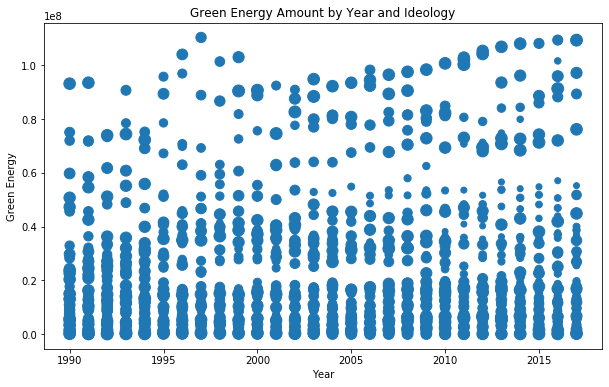

In [21]:
# Green energy per year, sized by ideology

fig, ax = plt.subplots(figsize=(10,6))

scatter = ax.scatter(x=data.year, y=data.green_energy, s=data.gov_ideology*2);
ax.set(title='Green Energy Amount by Year and Ideology', xlabel='Year', ylabel='Green Energy');

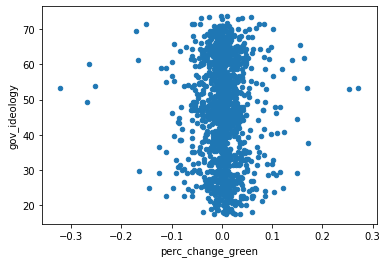

In [23]:
# Percent change in green energy production by government ideology
data.plot.scatter(x='perc_change_green',y='gov_ideology')

# Limited-set Visualizaitons

## California

In [18]:
california_df = data.loc[data["state_id"] == "TX"]
california_df.head()

,Unnamed: 0,state_id,year,conventional_energy,green_energy,pop_ideology,gov_ideology,population,median_income,green_per_capita,conv_per_capita,energy_total,perc_green_energy,perc_conv_energy,perc_change_green
1150,1150,TX,1990,263417636.0,17653268.0,35.843048,43.146252,17056755.0,51492,1.034972,15.443596,281070904.0,0.062807,0.937193,0.000000
1151,1151,TX,1991,263598088.0,22024819.0,32.214745,62.208248,17398005.0,48813,1.265939,15.151053,285622907.0,0.077112,0.922888,0.014304
1152,1152,TX,1992,262832410.0,27134925.0,42.266624,62.208248,17759738.0,48007,1.527890,14.799341,289967335.0,0.093579,0.906421,0.016468
1153,1153,TX,1993,285094040.0,14193545.0,34.067841,61.821930,18161612.0,48123,0.781514,15.697618,299287585.0,0.047424,0.952576,-0.046155
1154,1154,TX,1994,276664061.0,30276203.0,29.574076,61.821930,18564062.0,50466,1.630904,14.903207,306940264.0,0.098639,0.901361,0.051214


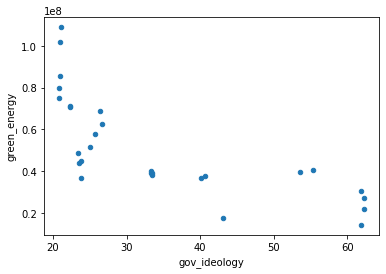

In [19]:
california_df.plot.scatter(x='gov_ideology',y='green_energy')

## High Population

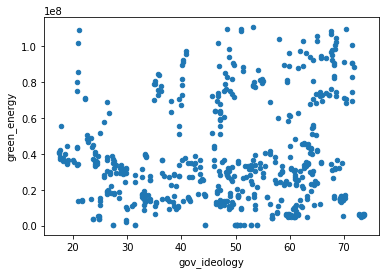

In [20]:
population_df = data.loc[data["population"] > 5000000]

population_df.plot.scatter(x='gov_ideology',y='green_energy')

# Select States Visualizations

In [9]:
combined_states = data.loc[(data["state_id"] == "TX") | (data["state_id"] == "CA") | (data["state_id"] == "OH") | (data["state_id"] == "FL") |  (data["state_id"] == "PA")  ] 
combined_states.head()

,Unnamed: 0,state_id,year,conventional_energy,green_energy,pop_ideology,gov_ideology,population,median_income,green_per_capita,conv_per_capita,energy_total,perc_green_energy,perc_conv_energy,perc_change_green
111,111,CA,1990,90666480.0,75118429.0,53.497696,49.020924,29959515.0,60726,2.507331,3.026300,165784909.0,0.453108,0.546892,0.000000
112,112,CA,1991,87173145.0,71769385.0,51.670151,49.668125,30470736.0,59253,2.355354,2.860881,158942530.0,0.451543,0.548457,-0.001565
113,113,CA,1992,103703251.0,73441997.0,52.472069,49.335564,30974659.0,59943,2.371035,3.348003,177145248.0,0.414586,0.585414,-0.036957
114,114,CA,1993,96229246.0,90749973.0,53.254501,49.596062,31274928.0,57078,2.901684,3.076881,186979219.0,0.485348,0.514652,0.070762
115,115,CA,1994,110944317.0,75233549.0,48.930843,47.864922,31484435.0,57975,2.389547,3.523783,186177866.0,0.404095,0.595905,-0.081253


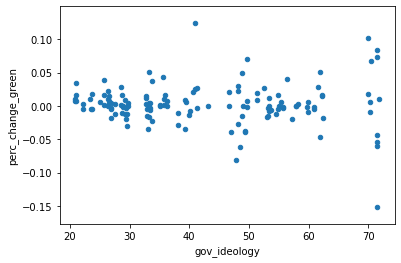

In [10]:
combined_states.plot.scatter(x='gov_ideology',y='perc_change_green')

## Population Percent

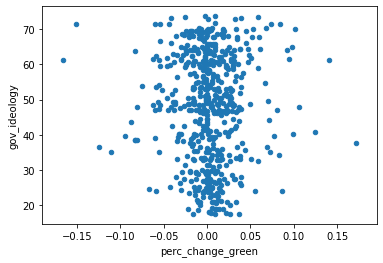

In [16]:
population_df_percent_change = data.loc[data["population"] > 5000000]

population_df_percent_change.plot.scatter(x='gov_ideology',y='perc_change_green')

In [15]:
liberal_idology = data.loc[data[gov_ideology] > .5]

NameError: name 'gov_ideology' is not defined